<a href="https://colab.research.google.com/github/Nur9702/15-dars/blob/main/11_MA%CA%BCLUMOTLARNI_TAYYORLASH_11_28_YAKUNIY_AMALIY_VAZIFA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![Imgur](https://i.imgur.com/h4PPC71.png)
#11-modul. Maʼlumotlarga ishlov berish. Maʼlumotlarni tayyorlash
# 11.28. Modul boʻyicha yakuniy amaliy vazifa

**Bu vazifalarni bajargach, maʼlumotlarni yuklash, tozalash, oʻzgartirish, matnlarni normalizatsiya qilish, qiymatlarni tekshirish, guruhlash va tahlil qilish kabi maʼlumotlarga ishlov berish (data processing) koʻnikmalarini egallaysiz.**

#**Umumiy maʼlumotlar bilan ishlash**

#Dataset haqida qisqacha maʼlumot
Restoran savdosi boʻyicha maʼlumotlar toʻplami 17 534 tranzaksiya uchun maʼlumotlarni oʻz ichiga oladi. Maʼlumotlar yetishmayotgan yoki baʼzilari toʻliq kiritilmagan boʻlishi mumkin. Maʼlumotlar toʻplamida asosiy taomlar, shirinliklar, ichimliklar kabi bir nechta toifadagi savdo tafsilotlari mavjud.


 0.   **Unnamed 0** – indekslarni;
 1.   **Order ID** – buyurtma IDʼsini;
 2.   **Customer ID** – mijoz IDʼsini;
 3.   **Category** – mahsulotlar kategoriyasini;
 4.   **Item** – mahsulot nomini;
 5.   **Price** – mahsulotning narxini;
 6.   **Quantity** – qancha mahsulot sotilgani miqdorini;
 7.   **Order Total** – umumiy narx qancha ekanini;
 8.   **Order Date** – buyurtma berilgan sanani (vaqt);
 9.   **Payment Method** – toʻlov usuli turini saqlaydi.

#1) Quyida berilgan datasetni yuklab olib, ustun nomlarini koʻring va ularni maʼno jihatdan tushunarli shaklga keltiring. `Unnamed: 0` ustunini tashlab yuboring!

In [1]:
import pandas as pd
import numpy as np

url = "https://raw.githubusercontent.com/alishermutalov/praktikum-datasets/refs/heads/praktikum/restaurant_sales.csv"
df = pd.read_csv(url)
df.head()

,Unnamed: 0,Order ID,Customer ID,Category,Item,Price,Quantity,Order Total,Order Date,Payment Method
0,0,ORD_705844,CUST_092,NaN,side salad#?,3.0,1.0,3.0,2023-12-21,Credit Card
1,1,ORD_338528,CUST_021,Side Dishes,Mashed Potatoes,4.0,3.0,12.0,2023-05-19,Digital Wallet
2,2,ORD_443849,CUST_029,Main Dishes,Grilled Chicken,15.0,4.0,60.0,2023-09-27,Credit Card
3,3,ORD_630508,CUST_075,Drinks,NaN,-1.0,2.0,5.0,2022-08-09,Credit Card
4,4,ORD_648269,CUST_031,Main Dishes,Pasta Alfredo,12.0,4.0,48.0,2022-05-15,Cash


In [2]:
#javobni shu yerda yozing
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17534 entries, 0 to 17533
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      17534 non-null  int64  
 1   Order ID        17534 non-null  object 
 2   Customer ID     17534 non-null  object 
 3   Category        17498 non-null  object 
 4   Item            15776 non-null  object 
 5   Price           17534 non-null  float64
 6   Quantity        17104 non-null  float64
 7   Order Total     17104 non-null  float64
 8   Order Date      17534 non-null  object 
 9   Payment Method  16452 non-null  object 
dtypes: float64(3), int64(1), object(6)
memory usage: 1.3+ MB


In [3]:
df = df.drop('Unnamed: 0', axis=1)


#2) Maʼlumotlarning umumiy holatini (info(), describe()) tekshiring.

In [4]:
#javobni shu yerda yozing
df.describe()

,Price,Quantity,Order Total
count,17534.000000,17104.000000,17104.000000
mean,6.207312,3.014149,19.914494
std,4.993782,1.414598,18.732549
min,-1.000000,1.000000,1.000000
25%,3.000000,2.000000,7.500000
50%,5.000000,3.000000,15.000000
75%,7.000000,4.000000,25.000000
max,20.000000,5.000000,100.000000


#3) Har bir ustundagi boʻsh qiymatlarni aniqlang va ularni toʻldirish strategiyasini ishlab chiqing.

In [5]:
#javobni shu yerda yozing
df.isnull().sum()

,0
Order ID,0
Customer ID,0
Category,36
Item,1758
Price,0
Quantity,430
Order Total,430
Order Date,0
Payment Method,1082


In [6]:
mode_category = df['Category'].mode()[0]
df['Category'].fillna(mode_category, inplace=True)
df['Quantity'].fillna(mode_category, inplace=True)
df['Order Total'].fillna(mode_category, inplace=True)
df['Item'].fillna(mode_category, inplace=True)
df['Payment Method'].fillna(mode_category, inplace=True)
df.head()


/tmp/ipython-input-3311582855.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Category'].fillna(mode_category, inplace=True)
/tmp/ipython-input-3311582855.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

,Order ID,Customer ID,Category,Item,Price,Quantity,Order Total,Order Date,Payment Method
0,ORD_705844,CUST_092,Main Dishes,side salad#?,3.0,1.0,3.0,2023-12-21,Credit Card
1,ORD_338528,CUST_021,Side Dishes,Mashed Potatoes,4.0,3.0,12.0,2023-05-19,Digital Wallet
2,ORD_443849,CUST_029,Main Dishes,Grilled Chicken,15.0,4.0,60.0,2023-09-27,Credit Card
3,ORD_630508,CUST_075,Drinks,Main Dishes,-1.0,2.0,5.0,2022-08-09,Credit Card
4,ORD_648269,CUST_031,Main Dishes,Pasta Alfredo,12.0,4.0,48.0,2022-05-15,Cash


In [7]:
df.isnull().sum()

,0
Order ID,0
Customer ID,0
Category,0
Item,0
Price,0
Quantity,0
Order Total,0
Order Date,0
Payment Method,0


#4) Har bir ustundagi takroriy qiymatlarni toping va ularga qanday oʻzgartirish kiritish kerakligini hal qiling.

In [11]:
#javobni shu yerda yozing
print("Number of duplicate rows:")
display(df.duplicated().sum())

print("\nNumber of duplicate Order IDs:")
display(df['Order ID'].duplicated().sum())

print("\nNumber of duplicate Customer IDs:")
display(df['Customer ID'].duplicated().sum())

Number of duplicate rows:


np.int64(0)


Number of duplicate Order IDs:


np.int64(0)


Number of duplicate Customer IDs:


np.int64(17434)

#5) Maʼlumotlar toʻplamidagi noto‘g‘ri maʼlumotlar (masalan, son turishi kerak bo‘lgan ustunda matn bo‘lsa) mavjudligini tekshiring va to‘g‘rilang.

In [10]:
#javobni shu yerda yozing
print("Data types of columns:")
display(df.dtypes)

Data types of columns:


,0
Order ID,object
Customer ID,object
Category,object
Item,object
Price,float64
Quantity,object
Order Total,object
Order Date,object
Payment Method,object


#6) Maʼlumotlar toʻplamidagi **katta/kichik harf** muammolari boʻlgan joylarni toping va bir xil formatga keltiring.

In [12]:
#javobni shu yerda yozing
print("Unique values in 'Category' before standardization:")
display(df['Category'].unique())

df['Category'] = df['Category'].str.title()

print("\nUnique values in 'Category' after standardization:")
display(df['Category'].unique())

display(df.head())

Unique values in 'Category' before standardization:


array(['Main Dishes', 'Side Dishes', 'Drinks', 'Desserts', 'Starters'],
      dtype=object)


Unique values in 'Category' after standardization:


array(['Main Dishes', 'Side Dishes', 'Drinks', 'Desserts', 'Starters'],
      dtype=object)

,Order ID,Customer ID,Category,Item,Price,Quantity,Order Total,Order Date,Payment Method
0,ORD_705844,CUST_092,Main Dishes,side salad#?,3.0,1.0,3.0,2023-12-21,Credit Card
1,ORD_338528,CUST_021,Side Dishes,Mashed Potatoes,4.0,3.0,12.0,2023-05-19,Digital Wallet
2,ORD_443849,CUST_029,Main Dishes,Grilled Chicken,15.0,4.0,60.0,2023-09-27,Credit Card
3,ORD_630508,CUST_075,Drinks,Main Dishes,-1.0,2.0,5.0,2022-08-09,Credit Card
4,ORD_648269,CUST_031,Main Dishes,Pasta Alfredo,12.0,4.0,48.0,2022-05-15,Cash


#7) Maʼlumotlar turini oʻzgartirish.
 * Ustunlarning maʼlumot turlarini tekshiring. Notoʻgʻri turlarga ega boʻlgan ustunlarni toʻgʻri formatga oʻtkazing.
 * `order_date` yoki unga oʻxshash ustunni datetime formatiga oʻtkazing.

In [13]:
#javobni shu yerda yozing
display(df.dtypes)

df['Order Date'] = pd.to_datetime(df['Order Date'])

df['Quantity'] = pd.to_numeric(df['Quantity'], errors='coerce')
df['Order Total'] = pd.to_numeric(df['Order Total'], errors='coerce')

print("\nData types after conversion:")
display(df.dtypes)

display(df.head())

,0
Order ID,object
Customer ID,object
Category,object
Item,object
Price,float64
Quantity,object
Order Total,object
Order Date,object
Payment Method,object



Data types after conversion:


,0
Order ID,object
Customer ID,object
Category,object
Item,object
Price,float64
Quantity,float64
Order Total,float64
Order Date,datetime64[ns]
Payment Method,object


,Order ID,Customer ID,Category,Item,Price,Quantity,Order Total,Order Date,Payment Method
0,ORD_705844,CUST_092,Main Dishes,side salad#?,3.0,1.0,3.0,2023-12-21,Credit Card
1,ORD_338528,CUST_021,Side Dishes,Mashed Potatoes,4.0,3.0,12.0,2023-05-19,Digital Wallet
2,ORD_443849,CUST_029,Main Dishes,Grilled Chicken,15.0,4.0,60.0,2023-09-27,Credit Card
3,ORD_630508,CUST_075,Drinks,Main Dishes,-1.0,2.0,5.0,2022-08-09,Credit Card
4,ORD_648269,CUST_031,Main Dishes,Pasta Alfredo,12.0,4.0,48.0,2022-05-15,Cash


#8) Mahsulot nomlarida noto‘g‘ri yoki nomaʼlum belgilar (?, NaN, #) mavjudligini tekshiring va ularni tuzating.

In [14]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17534 entries, 0 to 17533
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Order ID        17534 non-null  object        
 1   Customer ID     17534 non-null  object        
 2   Category        17534 non-null  object        
 3   Item            17534 non-null  object        
 4   Price           17534 non-null  float64       
 5   Quantity        17104 non-null  float64       
 6   Order Total     17104 non-null  float64       
 7   Order Date      17534 non-null  datetime64[ns]
 8   Payment Method  17534 non-null  object        
dtypes: datetime64[ns](1), float64(3), object(5)
memory usage: 1.2+ MB


#**Maʼlumotlarni filtrlash va qayta ishlash**

#9) Manfiy narx yoki 0 ga teng narx qiymatlarini toping va ularni qanday oʻzgartirish kerakligini hal qiling.

In [16]:
#javobni shu yerda yozing
nolga_teng_df = df[df['Price'] <= 0]
display(nolga_teng_df)

,Order ID,Customer ID,Category,Item,Price,Quantity,Order Total,Order Date,Payment Method
3,ORD_630508,CUST_075,Drinks,Main Dishes,-1.0,2.0,5.0,2022-08-09,Credit Card
75,ORD_367023,CUST_055,Side Dishes,Main Dishes,-1.0,NaN,NaN,2022-05-29,Main Dishes
83,ORD_167858,CUST_056,Side Dishes,Main Dishes,-1.0,5.0,25.0,2022-04-01,Cash
112,ORD_289733,CUST_057,Drinks,Main Dishes,-1.0,5.0,5.0,2022-01-05,Main Dishes
118,ORD_627458,CUST_058,Side Dishes,Main Dishes,-1.0,NaN,NaN,2023-08-24,Digital Wallet
...,...,...,...,...,...,...,...,...,...
17497,ORD_205432,CUST_090,Drinks,Main Dishes,-1.0,NaN,NaN,2022-03-03,Cash
17499,ORD_118085,CUST_089,Drinks,Main Dishes,-1.0,4.0,12.0,2023-04-09,Digital Wallet
17506,ORD_563553,CUST_044,Main Dishes,Main Dishes,-1.0,NaN,NaN,2022-07-20,Digital Wallet
17509,ORD_239707,CUST_056,Starters,Main Dishes,-1.0,1.0,8.0,2023-07-27,Credit Card


#10) Boʻsh toifalar (kategoriya) mavjudligini tekshiring va toʻgʻri kategoriya berish strategiyasini ishlab chiqing.

In [17]:
#javobni shu yerda yozing
df.isnull().sum()

,0
Order ID,0
Customer ID,0
Category,0
Item,0
Price,0
Quantity,430
Order Total,430
Order Date,0
Payment Method,0


#11) Bir xil, lekin turlicha yozilgan qiymatlar (Coffee, cofee, COFEE) mavjudligini tekshiring va tuzating.

In [18]:
#javobni shu yerda yozing
print("Alohida bo'lib qolgan yozuvlarni topish")
display(df['Category'].unique())

# hammasini kichik harfga o'zgartirish
df['Category'] = df['Category'].str.lower()

display(df['Category'].unique())

display(df.head())

Alohida bo'lib qolgan yozuvlarni topish


array(['Main Dishes', 'Side Dishes', 'Drinks', 'Desserts', 'Starters'],
      dtype=object)

array(['main dishes', 'side dishes', 'drinks', 'desserts', 'starters'],
      dtype=object)

,Order ID,Customer ID,Category,Item,Price,Quantity,Order Total,Order Date,Payment Method
0,ORD_705844,CUST_092,main dishes,side salad#?,3.0,1.0,3.0,2023-12-21,Credit Card
1,ORD_338528,CUST_021,side dishes,Mashed Potatoes,4.0,3.0,12.0,2023-05-19,Digital Wallet
2,ORD_443849,CUST_029,main dishes,Grilled Chicken,15.0,4.0,60.0,2023-09-27,Credit Card
3,ORD_630508,CUST_075,drinks,Main Dishes,-1.0,2.0,5.0,2022-08-09,Credit Card
4,ORD_648269,CUST_031,main dishes,Pasta Alfredo,12.0,4.0,48.0,2022-05-15,Cash


#12) `Customer ID` yoki boshqa identifikatorlarning takrorlanishini tekshiring.

In [19]:
#javobni shu yerda yozing
print("Birxil bo'lib qolgan qiymatlar")
display(df['Customer ID'].duplicated().sum())

print("Birxil qiymatlar soni")
display(df['Order ID'].duplicated().sum())

print("Birxil qiymatlar umumiysi")
display(df.duplicated().sum())

Birxil bo'lib qolgan qiymatlar


np.int64(17434)

Birxil qiymatlar soni


np.int64(0)

Birxil qiymatlar umumiysi


np.int64(0)

#13) Mahsulotning ortiqcha taʼriflarini olib tashlang (Water (0.5), Water (1.0), Water → faqat Water qoldirish).

In [22]:
#javobni shu yerda yozing
df['Item'] = df['Item'].str.replace(r'\s*\(.*\)', '', regex=True).str.replace('#', '', regex=False)

print("Unique values in 'Item' after cleaning:")
display(df['Item'].unique())

display(df.head())

Unique values in 'Item' after cleaning:


array(['side salad?', 'Mashed Potatoes', 'Grilled Chicken', 'Main Dishes',
       'Pasta Alfredo', 'Salmon', 'Garlic Bread', 'Vegetarian Platter',
       'Brownie', 'Sweet Potato Fries', 'Lemonade', 'Side Salad',
       'Orange Juice', 'Chocolate Cake', 'COCA COLA',
       'Grilled Vegetables', 'Coca Cola', 'Cheese Fries', 'Beef Chili',
       'Chicken Melt', 'Fruit Salad', 'French Fries', 'Ice Cream',
       'Cheesecake', 'CHOCOLATE CAKE', 'grilled vegetables', 'Iced Tea',
       'Water', 'Grilled Vegetables?', 'NACHOS GRANDE', 'water',
       'Onion Rings', 'STEAK', 'Steak', 'LEMONADE', 'Nachos Grande',
       'Grilled Chicken?', 'ICED TEA', 'CHICKEN MELT', 'lemonade',
       'ICE CREAM', 'GRILLED CHICKEN', 'french fries', 'grilled chicken',
       'Coca Cola?', 'FRUIT SALAD', 'steak', 'COCA COLA?', 'fruit salad',
       'MASHED POTATOES', 'cheesecake', 'ORANGE JUICE', 'French Fries?',
       'CHEESE FRIES', 'Side Salad?', 'FRENCH FRIES',
       'SWEET POTATO FRIES', 'PASTA ALFREDO',

,Order ID,Customer ID,Category,Item,Price,Quantity,Order Total,Order Date,Payment Method
0,ORD_705844,CUST_092,main dishes,side salad?,3.0,1.0,3.0,2023-12-21,Credit Card
1,ORD_338528,CUST_021,side dishes,Mashed Potatoes,4.0,3.0,12.0,2023-05-19,Digital Wallet
2,ORD_443849,CUST_029,main dishes,Grilled Chicken,15.0,4.0,60.0,2023-09-27,Credit Card
3,ORD_630508,CUST_075,drinks,Main Dishes,-1.0,2.0,5.0,2022-08-09,Credit Card
4,ORD_648269,CUST_031,main dishes,Pasta Alfredo,12.0,4.0,48.0,2022-05-15,Cash


#**Qayta ishlangan maʼlumotlar bilan tahlil**

#14) Eng koʻp sotilgan 5 ta mahsulotni aniqlang.

In [21]:
#javobni shu yerda yozing
item_sales = df.groupby('Item')['Quantity'].sum()

top_5_items = item_sales.sort_values(ascending=False).head(5)

print("Eng ko'p sotilgan 5 ta mahsulot")
display(top_5_items)

Eng ko'p sotilgan 5 ta mahsulot


,Quantity
Item,
Main Dishes,3980.0
Pasta Alfredo,2885.0
Side Salad,2765.0
Ice Cream,2762.0
Water,2726.0


#15) Har bir mijoz oʻrtacha qancha pul sarflaganini hisoblang.

In [26]:
#javobni shu yerda yozing
per_customer_average = df.groupby('Customer ID')['Order Total'].mean()

print("O'rtacha harajatlar har bir ho'rranda uchun")
display(per_customer_average.head())

O'rtacha harajatlar har bir ho'rranda uchun


,Order Total
Customer ID,
CUST_001,17.784483
CUST_002,19.904070
CUST_003,17.200637
CUST_004,19.503012
CUST_005,17.918301


#16) Mijozlarning qaysi kunlarda koʻproq xarid qilgani bo‘yicha tahlil qiling.

In [27]:
#javobni shu yerda yozing
df['Order Day of Week'] = df['Order Date'].dt.day_name()

# kunlardagi orderlar sonini hisoblash
orders_by_day = df['Order Day of Week'].value_counts()

print("Haftadagi orderlar soni")
display(orders_by_day)

Haftadagi orderlar soni


,count
Order Day of Week,
Friday,2531
Monday,2526
Saturday,2525
Thursday,2515
Sunday,2483
Wednesday,2477
Tuesday,2477


#17) Narxi oʻrtacha narxdan ikki barobar yuqori boʻlgan mahsulotlarni toping.

In [28]:
#javobni shu yerda yozing
ortacha_narx = df['Price'].mean()

# Calculate the threshold for twice the average price
ortachadan_2kk = 2 * ortacha_narx

# Filter the DataFrame to find items with a price greater than the threshold
katta2_mahsulotlar = df[df['Price'] > ortachadan_2kk]

print(f"2 karra katta mahsulotlar (Ortacha narx: ${ortacha_narx:.2f}):")
display(katta2_mahsulotlar)

2 karra katta mahsulotlar (Ortacha narx: $6.21):


,Order ID,Customer ID,Category,Item,Price,Quantity,Order Total,Order Date,Payment Method,Order Day of Week
2,ORD_443849,CUST_029,main dishes,Grilled Chicken,15.0,4.0,60.0,2023-09-27,Credit Card,Wednesday
5,ORD_381680,CUST_031,main dishes,Salmon,18.0,5.0,90.0,2022-07-20,Digital Wallet,Wednesday
7,ORD_146656,CUST_077,main dishes,Main Dishes,15.0,3.0,45.0,2023-02-15,Cash,Wednesday
9,ORD_743636,CUST_085,main dishes,Vegetarian Platter,14.0,5.0,70.0,2022-08-07,Main Dishes,Sunday
11,ORD_726419,CUST_025,main dishes,Salmon,18.0,5.0,90.0,2023-10-30,Cash,Monday
...,...,...,...,...,...,...,...,...,...,...
17453,ORD_591820,CUST_082,main dishes,Salmon,18.0,3.0,54.0,2023-12-08,Credit Card,Friday
17480,ORD_771570,CUST_093,main dishes,Salmon,18.0,2.0,36.0,2023-03-24,Credit Card,Friday
17490,ORD_900549,CUST_047,main dishes,salmon,18.0,2.0,36.0,2023-04-25,Digital Wallet,Tuesday
17495,ORD_872487,CUST_017,main dishes,Steak,20.0,5.0,100.0,2023-11-01,Credit Card,Wednesday


#18) Mahsulotlar kategoriyalari bo‘yicha tahlil qiling va eng ko‘p sotiladigan kategoriyalarni aniqlang.

In [29]:
#javobni shu yerda yozing
category_sales = df.groupby('Category')['Quantity'].sum()

top_categories = category_sales.sort_values(ascending=False)

print("Eng ko'p sotilgan kategoriyalar")
display(top_categories)

Eng ko'p sotilgan kategoriyalar


,Quantity
Category,
main dishes,10630.0
starters,10317.0
desserts,10234.0
drinks,10226.0
side dishes,10147.0


#19) Har bir mijozning oʻrtacha xarid miqdorini (`groupby("customer_id")`) hisoblang.

In [30]:
#javobni shu yerda yozing
ortacha_harid_miqdori = df.groupby('Customer ID')['Order Total'].mean()

print("Mijozlarning o'rtacha haridlari soni")
display(ortacha_harid_miqdori.head())

Mijozlarning o'rtacha haridlari soni


,Order Total
Customer ID,
CUST_001,17.784483
CUST_002,19.904070
CUST_003,17.200637
CUST_004,19.503012
CUST_005,17.918301


#20) Qanday omillar sotuv hajmiga ta’sir qiladi? Bu bo‘yicha umumiy xulosa chiqaring. Javobni quyida kommentariya sifatida yozing!

In [38]:
#javobni shu yerda yozing
df.columns

Index(['Order ID', 'Customer ID', 'Category', 'Item', 'Price', 'Quantity',
       'Order Total', 'Order Date', 'Payment Method', 'Order Day of Week'],
      dtype='object')

In [31]:
print(df.columns)

Index(['Order ID', 'Customer ID', 'Category', 'Item', 'Price', 'Quantity',
       'Order Total', 'Order Date', 'Payment Method', 'Order Day of Week'],
      dtype='object')


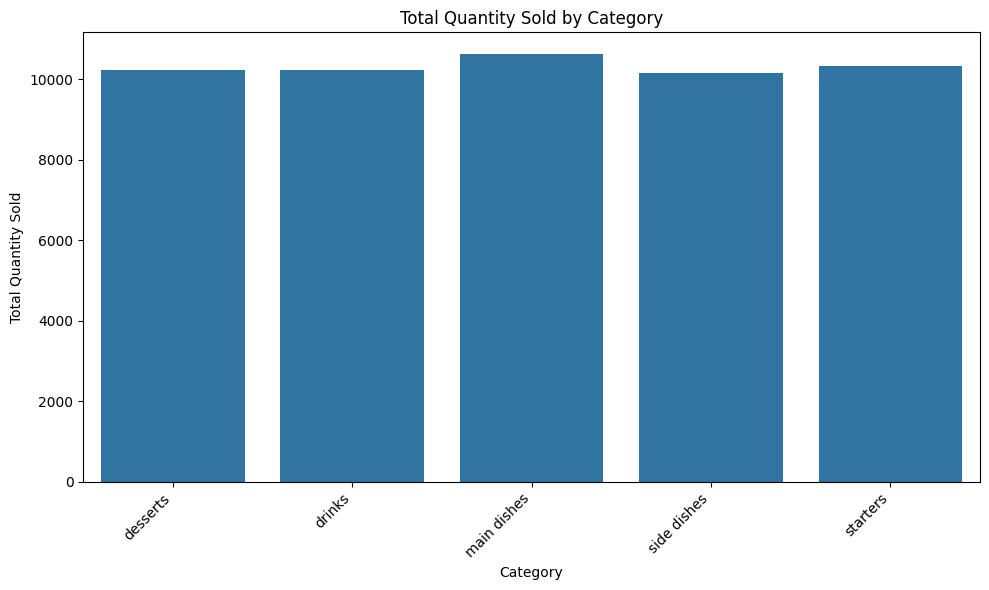

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

category_sales_quantity = df.groupby('Category')['Quantity'].sum()

plt.figure(figsize=(10, 6))
sns.barplot(x=category_sales_quantity.index, y=category_sales_quantity.values)
plt.title('Total Quantity Sold by Category')
plt.xlabel('Category')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Tavarlar sotuvi hajmiga ta'sir ko'rsatadigan omillar, season yani fasllar, kunning issiqligi yoki sovuqligi odamlarning sotib olish hoxishini kuchaytiradi. Shu sababdan tavarlarni sotish turlarini fasllarga qarab bo'lish lozim.
Hulosa qilib aytadigan bo'lsak, bu yerda mahsulot va uning narhida juda kotta bog'liqlik bor, shu sababdan tavarlar narhiga discount qilish sotish hajmini oshiradi, boshqa tarafdan mahsulotlarni turlariga qarab guruhlab sotish va unga 10 % discount qo'yib sotilsa sotiladigan tavarlar soni ham sezilarli darajada oshadi.